# Image Processing SS 20 - Assignment - 01
**Eduard Beiline & Bernard Breljak**

# Exercise 0 - Setup Development Enviroment - [1 Point]


In [0]:
# display the plots inside the notebook
%matplotlib inline

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import pylab
np.seterr(divide='ignore', invalid='ignore')
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

In [0]:
from skimage.data import astronaut

In [0]:
img = astronaut()   # Get the image
print(img.shape)    # the dimension of the image
print(img.dtype)    # the image type

(512, 512, 3)
uint8


In [0]:
img = img / 255.

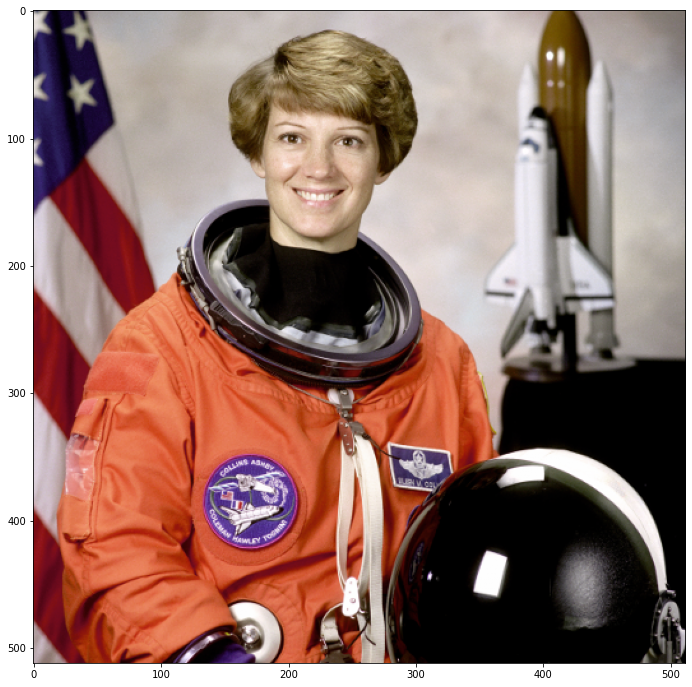

In [0]:
plt.imshow(img)
plt.show()

# Exercise 1 - Plot - [1 Point]

In [0]:
# Red channel
R = np.array(img)
R[:,:,1] = 0
R[:,:,2] = 0

# Green channel
G = np.array(img)
G[:,:,0] = 0
G[:,:,2] = 0

# Blue channel
B = np.array(img)
B[:,:,0] = 0
B[:,:,1] = 0

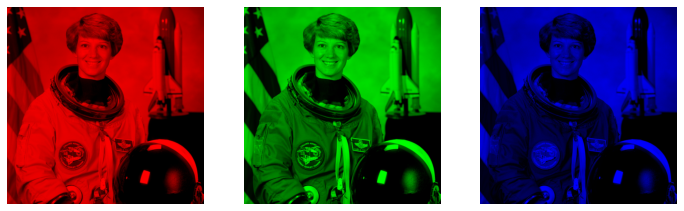

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(R)
ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(G)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(B)
ax3.axis('off')
plt.show()

## Exercise 2 - RGB to HSV [6 Points]

In [0]:
def rgb_to_hsv(x):
    """
    Converts the numpy array `x` from RGB to the HSV. 
    """
    r,g,b = x[...,0], x[...,1], x[...,2]

    cmax = np.maximum.reduce((r,g,b))
    cmin = np.minimum.reduce((r,g,b))
    delta = cmax-cmin
    
    # compute Hue 
    h = np.where(cmax==cmin, 0,(np.where(cmax == r, 60*(g-b)/delta, (np.where(cmax==g, 60*(((g-b)/delta)+2.0), 60*(((g-b)/delta)+4.0))))))
    h = np.where(h<0, h+360, h)

    # compute Saturation
    s = np.where(cmax==0,0, delta/cmax)

    # compute Value
    v = cmax
    
    # create x with new representation
    x = np.dstack((h,s,v))

    return x

In [0]:
def hsv_to_rgb(x):
    """
    Converts the numpy array `x` from HSV to the RGB. 
    """
    # getting the separate channels of x
    h,s,v = x[...,0], x[...,1], x[...,2]

    # calculating chroma
    c = s * v

    h_help = h/60

    y = c * (1-(np.abs((h_help%2)-1)))

    r1 = np.where(np.isnan(h),0,(np.where((h_help <= 1) | (h_help>5), c, (np.where((h_help>2) & (h_help<=4), 0, y)))))
    g1 = np.where(np.isnan(h),0,(np.where((h_help > 1) & (h_help<=3), c, (np.where(h_help>4, 0, y)))))
    b1 = np.where(np.isnan(h),0,(np.where(h_help <= 2, 0, (np.where((h_help>3) & (h_help<=5), c, y)))))
    
    m = v-c

    r = r1+m
    g = g1+m
    b = b1+m
    
    x = np.dstack((r,g,b))

    return x

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


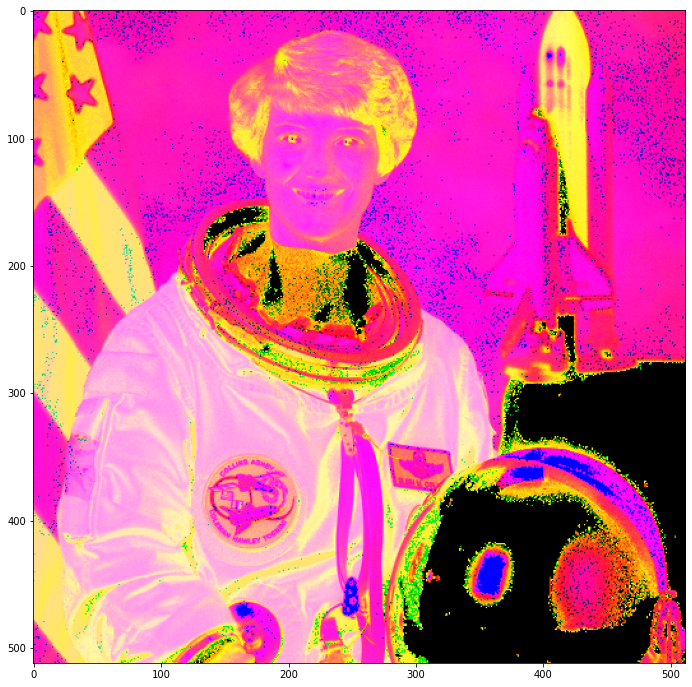

In [0]:
# plotting the HSV image

img_as_hsv = rgb_to_hsv(img)
plt.imshow(img_as_hsv)

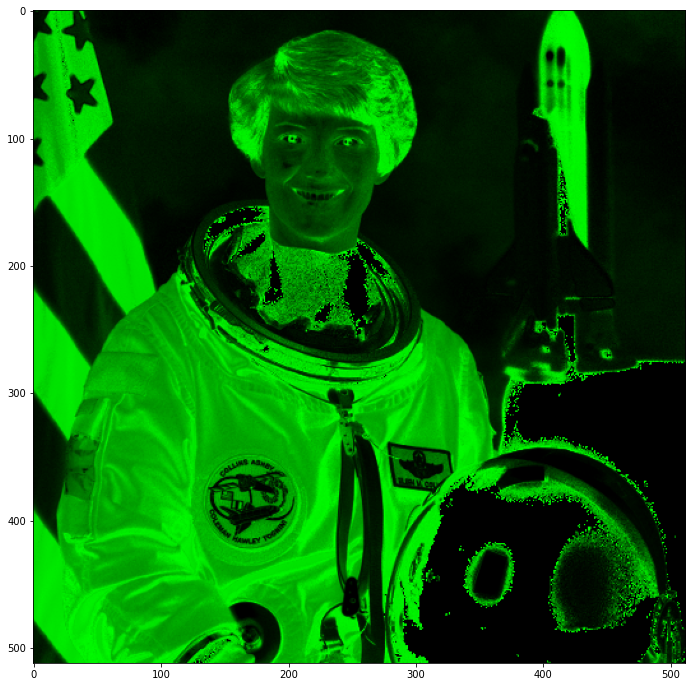

In [0]:
# plotting just the saturation

img_saturation = np.array(img_as_hsv)
img_saturation[:,:,0] = 0
img_saturation[:,:,2] =0

plt.imshow(img_saturation)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


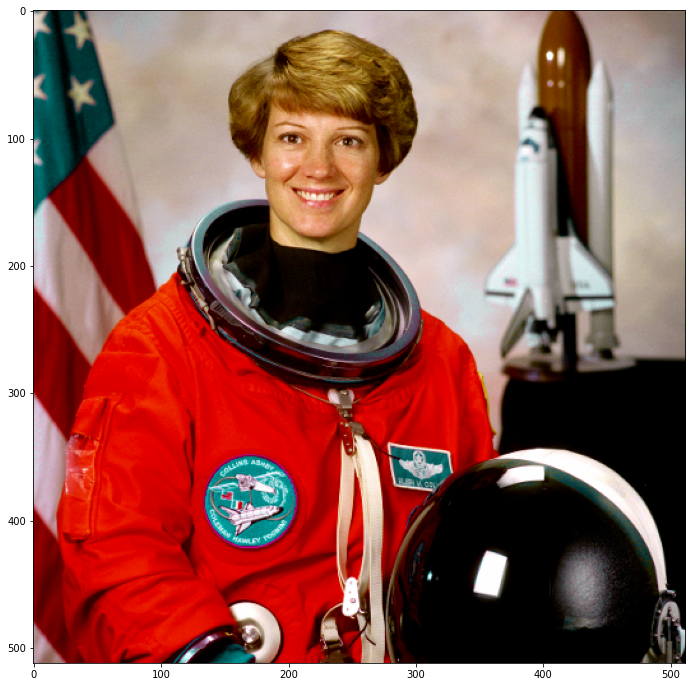

In [0]:
# plotting the saturation multiplied by 2

saturation_3_img = np.array(img_as_hsv)
saturation_3_img[...,1] = saturation_3_img[...,1] * 2
final_img = hsv_to_rgb(saturation_3_img)

plt.imshow(final_img)

# Exercise 3 - Callculation [2 Points]


In [0]:
ARGB_to_XYZ = np.matrix([[0.57677, 0.18556, 0.18823],[0.29734, 0.62736, 0.07529], [0.02703, 0.07069, 0.99134]])

ARGB1 = np.array([0, 0.5, 0.5])
ARGB2 = np.array([0.33, 0.33, 0.33])

XYZ1 = ARGB_to_XYZ.dot(ARGB1)
print("ARGB1 has coordinates:", XYZ1)

XYZ2 = ARGB_to_XYZ.dot(ARGB2)
print("ARGB2 has coordinates:", XYZ2)

ARGB1 has coordinates: [[0.186895 0.351325 0.531015]]
ARGB2 has coordinates: [[0.3136848 0.3299967 0.3593898]]


![alt text](https://github.com/Eduard953/Image_Processing_SS20/blob/master/Images/CIEXYZ-space.PNG?raw=true)*

Indem man eine Gerade zwischen den beiden Wellenlängen CIEXYZ-Diagramm zieht, findet man den treffenden XYZ-Wert. Da die Intensität der Sodium-Lampe doppelt der Quecksilberlampe ist, ist der für den Menschen zusehende Farbe Hellrot, mit den XYZ-Wert von etwa
<br>**(0.52, 0.28, 0.2)**.